In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
# Read pre-processed data
original_data = pd.read_pickle("./data/prepared/preparedData.pkl")
data_copy = original_data.copy()

In [3]:
data_copy

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In this analysis, we have decided to exclude the coronavirus data. We argue that corona has clearly affected the usage behavior of charging station users, as home office and other legal regulations have had a significant impact on the demand for energy for electric cars. Since there were also lockdowns at times, people did not have the need to charge their cars, only shopping consumed energy. A separate consideration of the corona period certainly makes sense, but not in an analysis in which normal usage behavior is to be analyzed. We have set the beginning of 2021 as the time at which usage behavior returned to normal.

In [4]:
data = data_copy[(data_copy['connectionTime'] < "2020-04-01") ^ (data_copy['connectionTime'] >= "2021-01-01")].copy()
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54631 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          54631 non-null  datetime64[ns, UTC]
 1   disconnectTime          54631 non-null  datetime64[ns, UTC]
 2   doneChargingTime        54631 non-null  datetime64[ns, UTC]
 3   kWhDelivered            54631 non-null  float64            
 4   siteID                  54631 non-null  int64              
 5   userID                  39445 non-null  float64            
 6   combinedSpaceStationID  54631 non-null  object             
 7   timeConnected           54631 non-null  float64            
 8   idleTime                54631 non-null  float64            
 9   chargingTime            54631 non-null  float64            
 10  weekday                 54631 non-null  int32              
 11  month                   54631 non-null  int32 

In [6]:
# Convert data to correct timezone
data['connectionTime'] = data['connectionTime'].dt.tz_convert(tz='Etc/GMT-8')
data['disconnectTime'] = data['disconnectTime'].dt.tz_convert(tz='Etc/GMT-8')
data['doneChargingTime'] = data['doneChargingTime'].dt.tz_convert(tz='Etc/GMT-8')
data["ConnectionHour"] = data['connectionTime'].dt.hour
data["weekday"] = data["connectionTime"].dt.day_of_week

In this step, we project each charging session to a time progress in the week so that we don't just have 7 bars for 7 days or 24 hours for one day when clustering. To do this, we calculate the number of minutes in a week and then calculate the proportion of the charging session based on the progress in the week. Monday morning at 00:00 would correspond to 0% progress, Sunday evening at 23:59, almost 100%.

In [7]:
total_time_in_week = 7 * 24 * 60  # 7 Tage * 24 Stunden * 60 Minuten
data["progressInWeek"] = (data["weekday"] * 24 * 60 + data["ConnectionHour"] * 60 + data['connectionTime'].dt.minute) / total_time_in_week

In [8]:
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,...,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,ConnectionHour,progressInWeek
0,2020-01-02 21:08:54+08:00,2020-01-03 03:11:15+08:00,2020-01-03 01:31:35+08:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,...,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",21,0.554365
1,2020-01-02 21:36:50+08:00,2020-01-03 06:38:21+08:00,2020-01-03 04:18:05+08:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,...,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",21,0.557143
2,2020-01-02 21:56:35+08:00,2020-01-03 08:39:22+08:00,2020-01-03 00:35:06+08:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,...,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",21,0.559127
3,2020-01-02 21:59:58+08:00,2020-01-03 00:38:39+08:00,2020-01-02 23:18:45+08:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,...,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",21,0.559425
4,2020-01-02 22:00:01+08:00,2020-01-03 06:08:40+08:00,2020-01-03 02:17:30+08:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,...,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",22,0.559524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-02 03:13:11+08:00,2019-07-02 08:44:40+08:00,2019-07-02 05:13:56+08:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,...,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT",3,0.162004
56532,2019-07-02 03:43:46+08:00,2019-07-02 10:58:53+08:00,2019-07-02 10:43:53+08:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,...,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT",3,0.164980
56533,2019-07-02 04:34:30+08:00,2019-07-02 08:30:52+08:00,2019-07-02 05:27:44+08:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,...,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT",4,0.170040
56534,2019-07-02 05:49:12+08:00,2019-07-02 09:37:18+08:00,2019-07-02 07:14:33+08:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,...,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT",5,0.177480


We are only interested in numeric data when clustering. Data such as connectionTime, disconnectTime, doneChargingTime or the station-id do not provide further value for our clustering analysis.

In [9]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.describe()

,kWhDelivered,siteID,userID,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable,ConnectionHour,progressInWeek
count,54631.000000,54631.000000,39445.000000,54631.000000,54631.000000,54631.000000,54631.000000,54631.000000,39445.000000,39445.000000,39445.000000,39445.000000,54631.000000,54631.000000
mean,11.293437,1.510919,1681.848675,23633.045487,11175.775860,12457.269627,2.551628,6.500064,364.711497,24.038724,70.514032,356.893903,12.102762,0.439486
std,9.887313,0.499885,2518.444186,17953.702272,14798.209707,10745.871249,1.672916,3.372580,103.168859,20.366143,59.665572,189.716102,9.243485,0.228611
min,0.501000,1.000000,1.000000,183.000000,0.000000,0.000000,0.000000,1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.930000,1.000000,436.000000,11334.000000,547.500000,5725.000000,1.000000,4.000000,291.000000,11.320000,30.000000,194.000000,3.000000,0.275198
50%,8.727000,2.000000,743.000000,24260.000000,7365.000000,9752.000000,2.000000,7.000000,364.000000,17.520000,50.000000,360.000000,10.000000,0.427778
75%,13.898000,2.000000,1707.000000,33591.000000,18825.000000,16751.000000,4.000000,9.000000,400.000000,30.000000,100.000000,503.000000,22.000000,0.598413
max,75.528000,2.000000,19923.000000,882969.000000,562037.000000,720057.000000,6.000000,12.000000,2000.000000,215.320000,480.000000,1913.000000,23.000000,0.999901


## Clustering 1

The first thing we found interesting was how the loading quantity and time behave and whether groupings are possible there.

In [10]:
cluster_data = pd.DataFrame()
cluster_data['progressInWeek'] = numeric_data['progressInWeek']
cluster_data['kWhDelivered'] = numeric_data['kWhDelivered']

In [11]:
cluster_data

,progressInWeek,kWhDelivered
0,0.554365,25.016
1,0.557143,33.097
2,0.559127,6.521
3,0.559425,2.355
4,0.559524,13.375
...,...,...
56531,0.162004,6.048
56532,0.164980,41.047
56533,0.170040,5.390
56534,0.177480,8.399


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cluster_data)
cluster_data_scaled = scaler.transform(cluster_data)
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled, columns=cluster_data.columns, index=cluster_data.index)
cluster_data_scaled_df.describe()

,progressInWeek,kWhDelivered
count,5.463100e+04,5.463100e+04
mean,2.185045e-16,-7.491582e-17
std,1.000009e+00,1.000009e+00
min,-1.922437e+00,-1.091554e+00
25%,-7.186401e-01,-6.436021e-01
50%,-5.121435e-02,-2.595711e-01
75%,6.951916e-01,2.634272e-01
max,2.451415e+00,6.496725e+00


In [13]:
from sklearn.cluster import KMeans

In [14]:
# max 25 clusters reasonable in this context
k_max = 25

In [15]:
# From workshop
# These lines initialize two empty lists to store the number of clusters (clusters) and the
# corresponding inertia (sum of squared distances to the nearest cluster center) for each k value (losses)
clusters = []
losses = []

# This is a loop that iterates over different values of k
for k in range(k_max):
    # For each k, a new instance of the KMeans clustering algorithm is created. The n_clusters parameter is set to k+1 to specify the number of clusters, and n_init='auto' indicates
    # that the algorithm should automatically choose the number of initializations for the centroids
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(cluster_data_scaled)
    clusters.append(k+1)

    # The inertia of the fitted model is calculated using the inertia_ attribute, representing the sum of squared distances to the nearest cluster center.
    # This value is then appended to the losses list
    losses.append(model.inertia_)

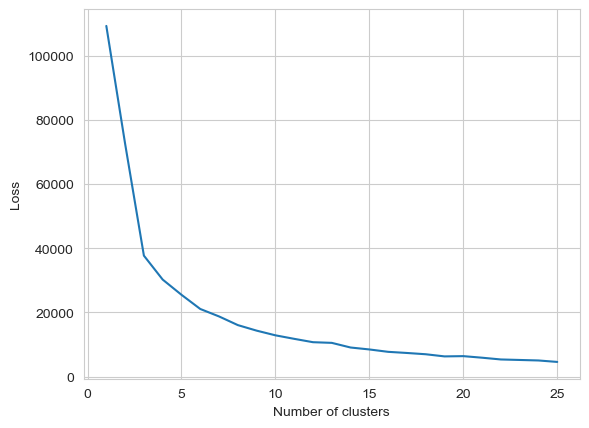

In [16]:
# From workshop
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 5.0)

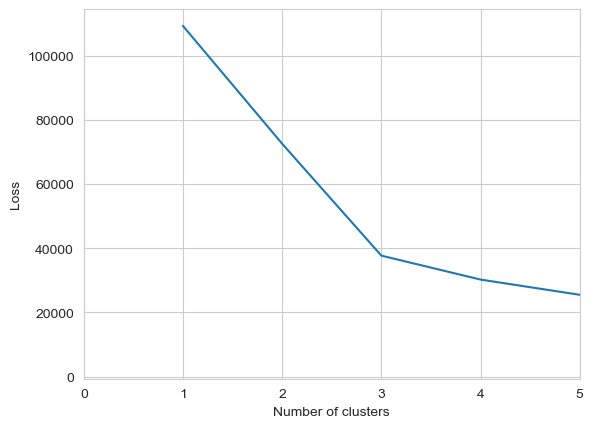

In [17]:
# From workshop
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,5])

Elbow at 3 clusters. So we need 3 groups.

In [18]:
numbers = ["zero", "one", "two"]

sessions_scaled = cluster_data_scaled_df.copy()
three_means = KMeans(n_clusters=3, n_init='auto')
three_means.fit(cluster_data_scaled)

KMeans(n_clusters=3, n_init='auto')

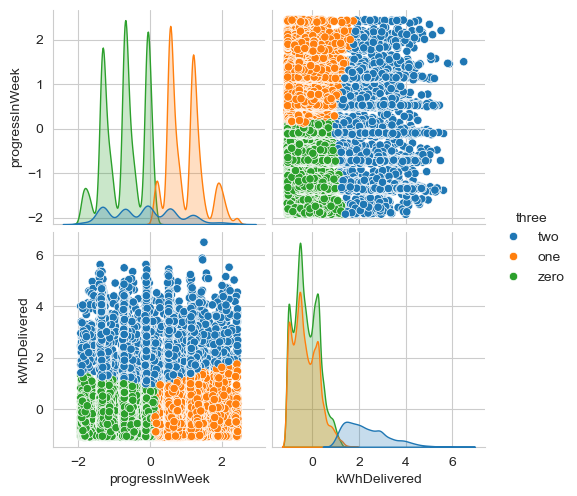

In [19]:
sessions_scaled["three"] = three_means.predict(cluster_data_scaled)
sessions_scaled["three"] = sessions_scaled["three"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="three")

It seems like cluster two (blue) is the biggest cluster. Let's count how many values lie in each cluster.

In [20]:
cluster_sizes = sessions_scaled["three"].value_counts()
cluster_sizes

three
zero    27497
one     21136
two      5998
Name: count, dtype: int64

Surprisingly cluster two (blue) is the smallest. Let's see that in a bar plot.

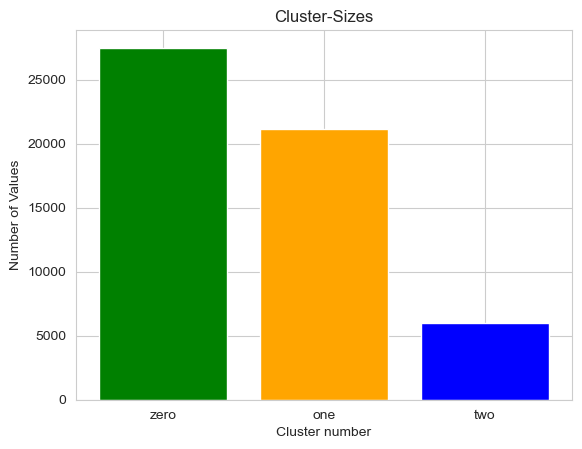

In [21]:
colors = ['green', 'orange', 'blue']
plt.bar(x=cluster_sizes.index, height=cluster_sizes, color=colors)
plt.title('Cluster-Sizes')
plt.xlabel('Cluster number')
plt.ylabel('Number of Values')
plt.show()

Let's find some funny names for the clusters:

zero:   **Midweek and weekend Rechargers** (People from cluster one (and others) that recharge their cars)

one:    **Monday Chargers** (People who load their cars at the beginning of the week, but not full)

two:    **Full-Throttle Chargers** (People who fully charge their vehicles independent from progress of week)


The required kWh and the size and charging capacities of the car batteries were disregarded. For a station operator, only the absolute energy requirement is decisive.

## Clustering 2

Next we wanted to find out whether people use exactly the energy they have requested and whether there differences in behaviour emerge.

In [22]:
cluster_data = pd.DataFrame()
cluster_data['kWhRequested'] = numeric_data['kWhRequested']
cluster_data['kWhDelivered'] = numeric_data['kWhDelivered']

In [23]:
# Drop all session that do not have userInput, as kWhRequested is a userInput field
cluster_data.dropna(inplace=True)

In [24]:
scaler = StandardScaler()
scaler.fit(cluster_data)
cluster_data_scaled = scaler.transform(cluster_data)
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled, columns=cluster_data.columns, index=cluster_data.index)
cluster_data_scaled_df.describe()

,kWhRequested,kWhDelivered
count,3.944500e+04,3.944500e+04
mean,-9.222915e-17,8.070051e-17
std,1.000013e+00,1.000013e+00
min,-1.180343e+00,-1.181999e+00
25%,-6.245112e-01,-6.703162e-01
50%,-3.200806e-01,-2.780263e-01
75%,2.927089e-01,2.427528e-01
max,9.392240e+00,5.927072e+00


In [25]:
# From workshop
# Recalculate clusters and losses
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(cluster_data_scaled)
    clusters.append(k+1)
    
    losses.append(model.inertia_)

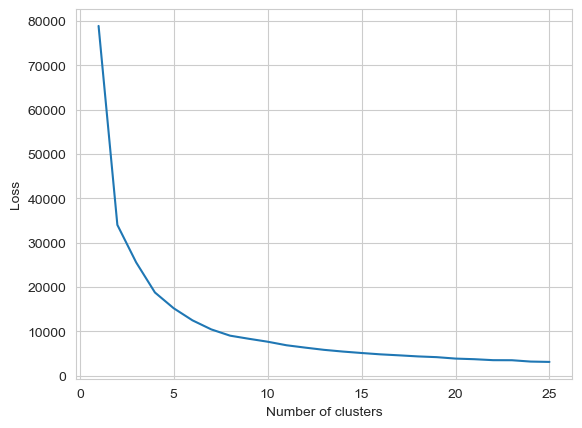

In [26]:
# From workshop
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 4.0)

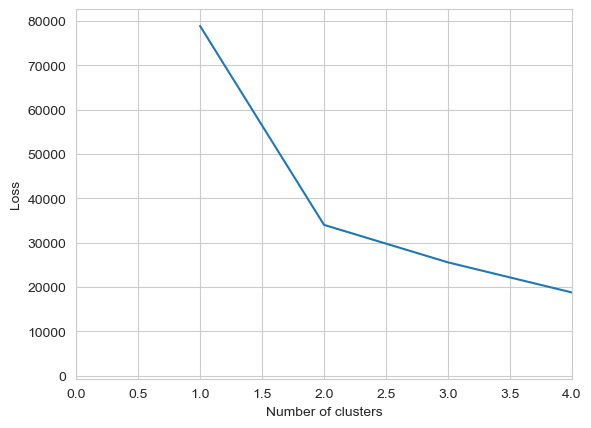

In [27]:
# From workshop
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,4])

Elbow at 2 clusters. So we need 2 groups.

In [28]:
numbers = ["zero", "one"]

sessions_scaled = cluster_data_scaled_df.copy()
two_means = KMeans(n_clusters=2, n_init='auto')
two_means.fit(cluster_data_scaled)

KMeans(n_clusters=2, n_init='auto')

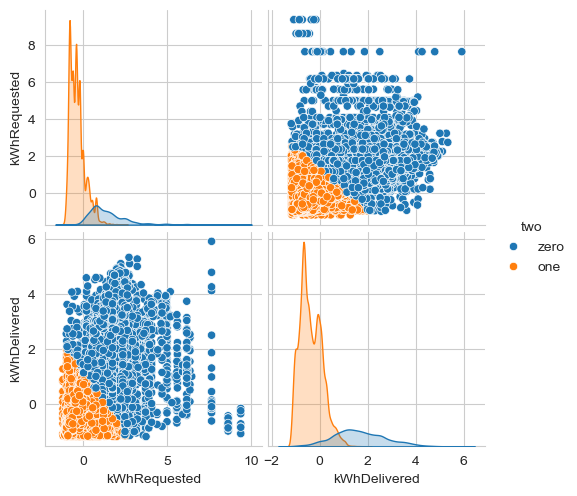

In [29]:
sessions_scaled["two"] = two_means.predict(cluster_data_scaled)
sessions_scaled["two"] = sessions_scaled["two"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="two")

It seems like cluster one (blue) is the biggest cluster. Let's count how many values lie in each cluster.

In [30]:
cluster_sizes = sessions_scaled["two"].value_counts()
cluster_sizes

two
one     32139
zero     7306
Name: count, dtype: int64

Surprisingly cluster one (blue) is again smaller. Let's see that in a bar plot.

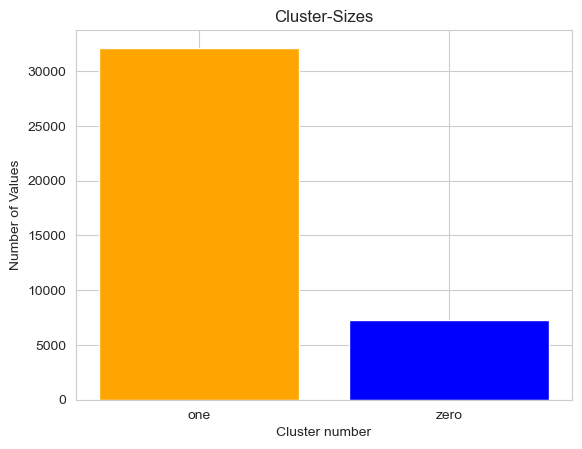

In [31]:
colors = ['orange', 'blue']
plt.bar(x=cluster_sizes.index, height=cluster_sizes, color=colors)
plt.title('Cluster-Sizes')
plt.xlabel('Cluster number')
plt.ylabel('Number of Values')
plt.show()

Let's find some funny names for the clusters:

zero:   **Gentle Chargers** (People that claim less and use exactly the amount they have requested)

one:    **Power-Hungry Globetrotters, Modest Plug Users and Electric Optimizers** (People who either request and consume a lot of energy, request less and consume more, or request a lot but consume less)


## Clustering 3

At last we wanted to see whether there are differences in charging efficiency i.e. the relation between idleTime and the whole connection time (or chargingTime and TimeConnected) and the progress in week.

In [32]:
cluster_data = pd.DataFrame()
cluster_data['progressInWeek'] = numeric_data['progressInWeek']
cluster_data['efficiency'] = numeric_data['chargingTime'] / numeric_data['timeConnected']

In [33]:
cluster_data

,progressInWeek,efficiency
0,0.554365,0.724944
1,0.557143,0.740974
2,0.559127,0.246610
3,0.559425,0.496481
4,0.559524,0.526928
...,...,...
56531,0.162004,0.364272
56532,0.164980,0.965526
56533,0.170040,0.225215
56534,0.177480,0.374178


In [34]:
scaler = StandardScaler()
scaler.fit(cluster_data)
cluster_data_scaled = scaler.transform(cluster_data)
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled, columns=cluster_data.columns, index=cluster_data.index)
cluster_data_scaled_df.describe()

,progressInWeek,efficiency
count,5.463100e+04,5.463100e+04
mean,2.185045e-16,-2.237070e-17
std,1.000009e+00,1.000009e+00
min,-1.922437e+00,-1.997806e+00
25%,-7.186401e-01,-8.907779e-01
50%,-5.121435e-02,-2.131789e-02
75%,6.951916e-01,1.115820e+00
max,2.451415e+00,1.237681e+00


In [35]:
# From workshop
# Recalculate clusters and losses
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(cluster_data_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

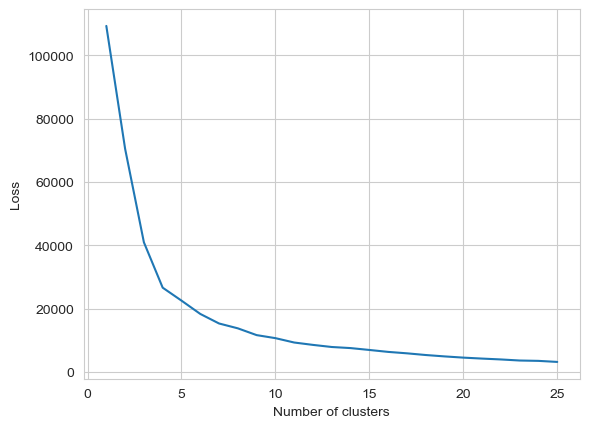

In [36]:
# From workshop
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 4.5)

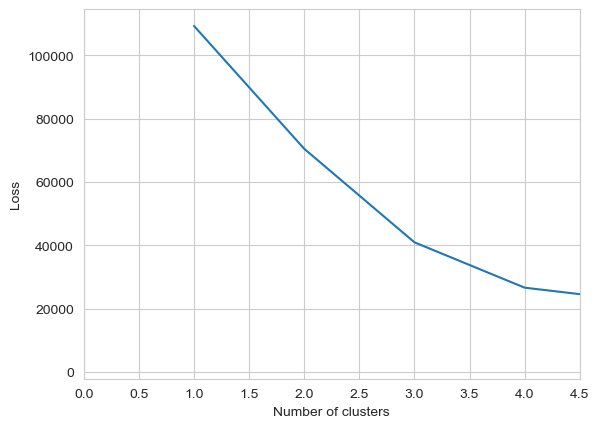

In [37]:
# From workshop
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,4.5])

Elbow criteria not that obvious in this case. However at 4 the curve gets more convex.

In [38]:
numbers = ["zero", "one", "two", "three"]

sessions_scaled = cluster_data_scaled_df.copy()
four_means = KMeans(n_clusters=4, n_init='auto')
four_means.fit(cluster_data_scaled)

KMeans(n_clusters=4, n_init='auto')

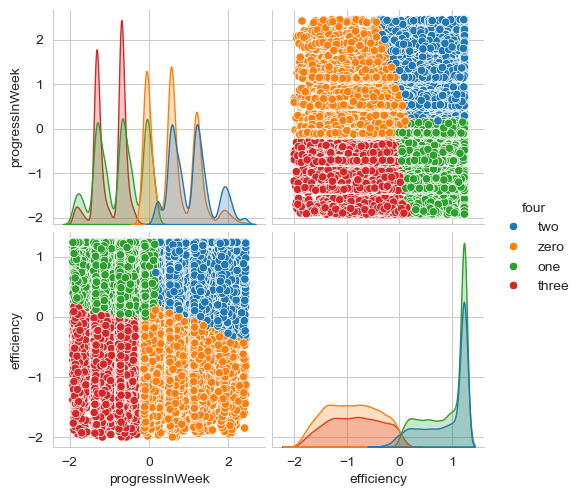

In [39]:
sessions_scaled["four"] = four_means.predict(cluster_data_scaled)
sessions_scaled["four"] = sessions_scaled["four"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="four")

Lets count again the number of occurences in each cluster.

In [40]:
cluster_sizes = sessions_scaled["four"].value_counts()
cluster_sizes

four
zero     16307
one      15267
two      11679
three    11378
Name: count, dtype: int64

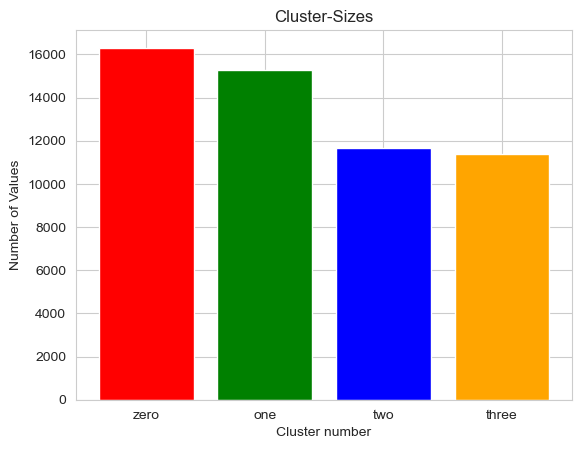

In [41]:
colors = ['red', 'green', 'blue', 'orange']
plt.bar(x=cluster_sizes.index, height=cluster_sizes, color=colors)
plt.title('Cluster-Sizes')
plt.xlabel('Cluster number')
plt.ylabel('Number of Values')
plt.show()

Again let's find some funny names for the clusters:

zero:   **Efficient monday sessions** (Sessions with less idleTime at the beginning of the week)

one:    **Monday overcharging sessions** (Sessions with more idleTime at the beginning of the week)

two:    **Efficient midweek and weekend sessions** (Sessions with less idleTime at the middle and end of the week)

three:    **Inefficient midweek and weekend sessions** (Sessions more less idleTime at the middle and end of the week)